# Machine Learning Portfolio - OkCupid Date-A-Scientist

## Introduction

For this project, we are analyzing data on OKCupid, an app that focuses on using multiple choice and short answers to match users.

We will investigate the data and make predictions on ______ using Scikit-learn.

## Preparations

First, we import libraries for loading and visualizing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then, we load the csv data into DataFrame object.

In [39]:
profiles = pd.read_csv("profiles.csv", encoding='utf-8')

## Analysing Data

After loading the data, the columns and their unique values are investigated to check if there are any specific features we can try to predict using machine learning.

First, the number of entries in the database is checked.

In [3]:
len(profiles)

59946

There are 59946 rows of data in the dataframe, representing the profiles of the 59946 person who uses the app.

Then, the first 5 rows of the dataframe is printed to give an overview.

In [4]:
print(profiles.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

There are 31 columns in the dataframe, which means there are 31 features. The features are the following:

In [5]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

Next, we try to find the unique values for each of the features.

In [6]:
for feature in profiles.columns:
    print(feature)
    print(profiles[feature].unique())
    print("")

age
[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]

body_type
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']

diet
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']

drinks
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']

drugs
['never' 'sometimes' nan 'often']

education
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on maste

 'out at happy hour with my friends, running into other friends,\nranting about something hardly worth the rant .. or at home.']

essay8
['i am new to california and looking for someone to wisper my secrets\nto.'
 'i am very open and will share just about anything.'
 'when i was five years old, i was known as "the boogerman".' ...
 'please let me think about this more.'
 "i like walking around in other people's house naked. seriously.\nbodies are beautiful and it makes an awkward situation funny!"
 'i wish i could cry like holly hunter in broadcast news.']

essay9
['you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.'
 nan
 'you are bright, open, intense, silly, ironic, critical, caring,\ngenerous, looking for an exploration, rather than finding "a match"\nof some predetermined qualities.<br />\n<br />\ni\'m currently in a fabulous and open relationship, so you should be\ncomfortabl

['english' 'english (fluently), spanish (poorly), french (poorly)'
 'english, french, c++' ...
 'english (fluently), hindi (poorly), french (poorly), tamil (okay), spanish (poorly)'
 'english (fluently), french (poorly), japanese (poorly), latin (poorly)'
 'english (fluently), french, farsi']

status
['single' 'available' 'seeing someone' 'married' 'unknown']



Some features, such as age, diet, drinks, have distinct unique values. Some features have open-ended answers such as essay0-essay9. Some features, such as ethnicity and sign, has distinct values with repeated answers. For example, for sign, "gemini", "gemini but it doesn't matter", "gemini and it's fun to think about", and more all means the person's sign is gemini. 

Now, the distribution of values of different features are investigated.

<AxesSubplot:xlabel='age', ylabel='Count'>

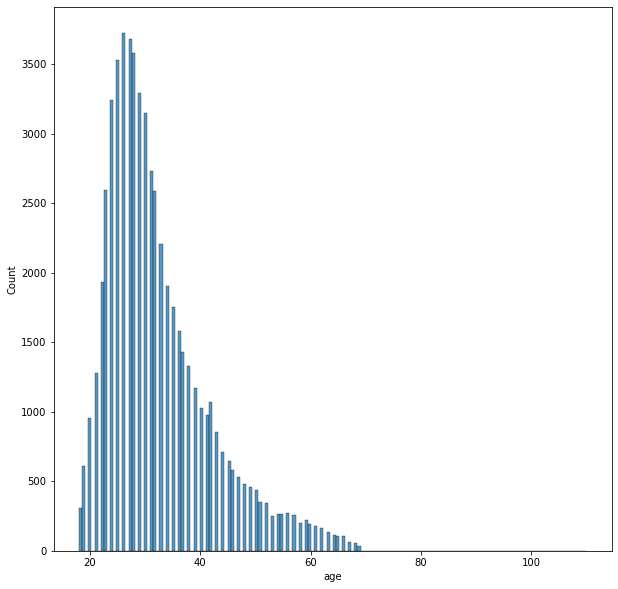

In [7]:
plt.figure(figsize=(10, 10))
sns.histplot(profiles, x="age")

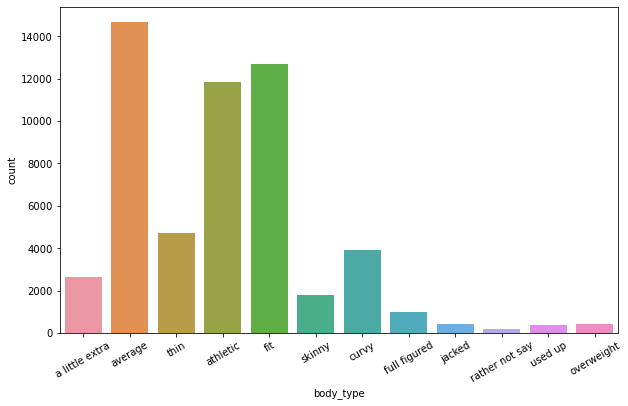

In [8]:
plt.figure(figsize=(10, 6))
graph = sns.countplot(data=profiles, x="body_type")
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
plt.show()

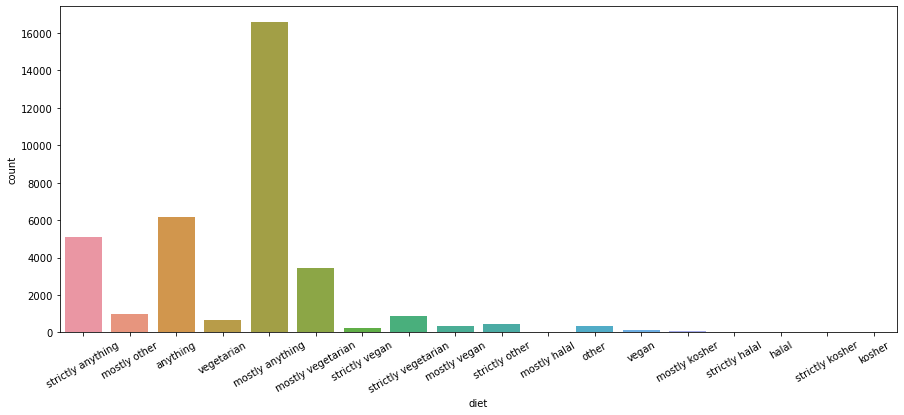

In [9]:
plt.figure(figsize=(15, 6))
graph = sns.countplot(data=profiles, x="diet")
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
plt.show()

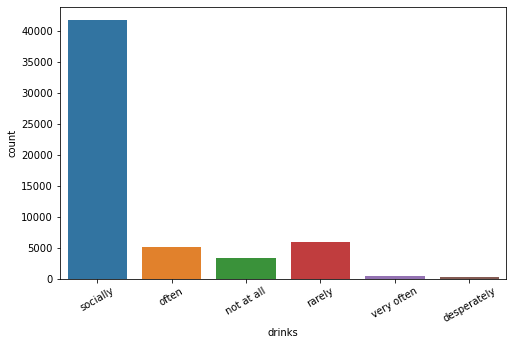

In [10]:
plt.figure(figsize=(8, 5))
graph = sns.countplot(data=profiles, x="drinks")
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
plt.show()

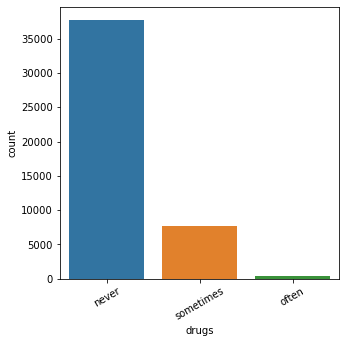

In [11]:
plt.figure(figsize=(5, 5))
graph = sns.countplot(data=profiles, x="drugs")
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
plt.show()

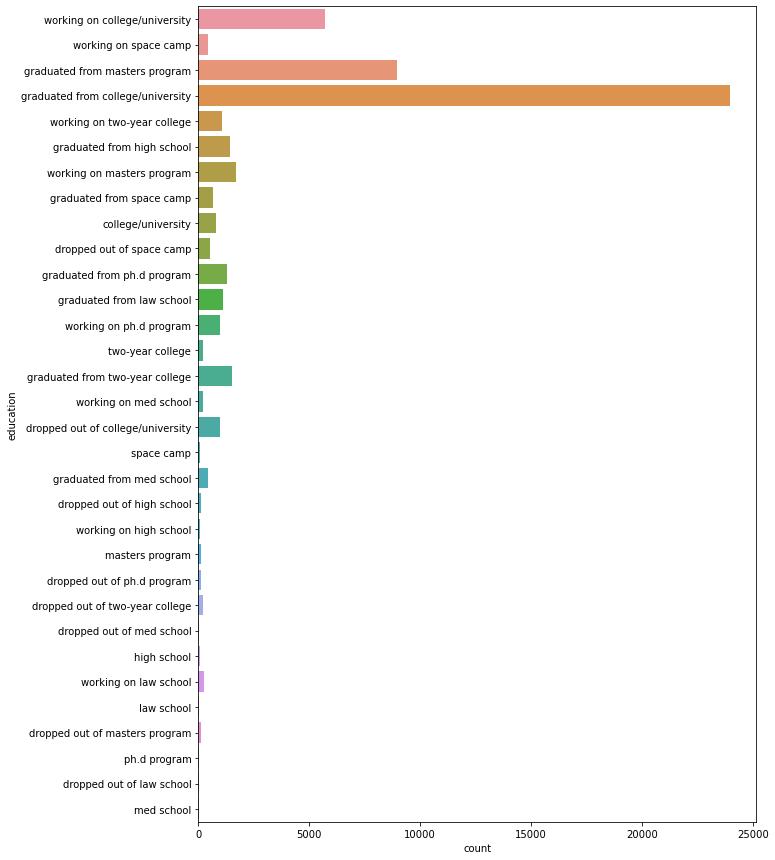

In [12]:
plt.figure(figsize=(10, 15))
graph = sns.countplot(data=profiles, y="education")
plt.show()

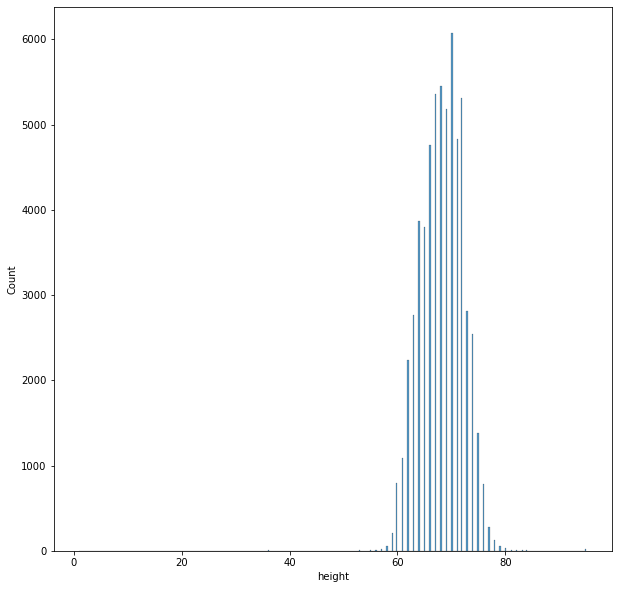

In [13]:
plt.figure(figsize=(10, 10))
graph = sns.histplot(profiles, x="height")

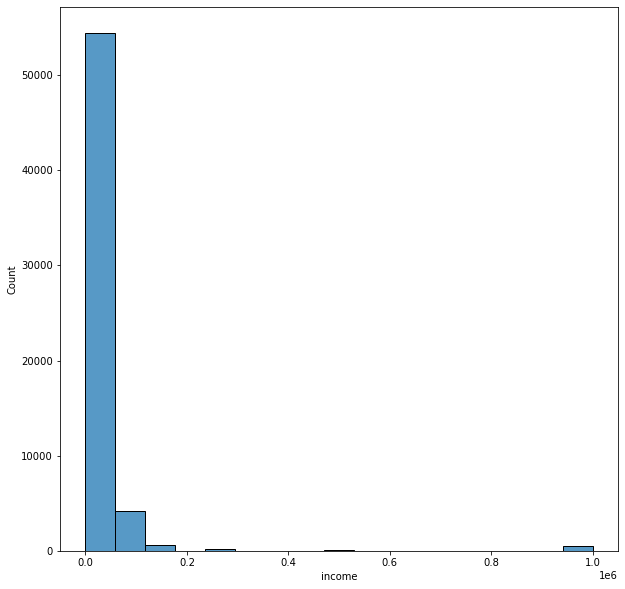

In [14]:
plt.figure(figsize=(10, 10))
graph = sns.histplot(profiles, x="income")

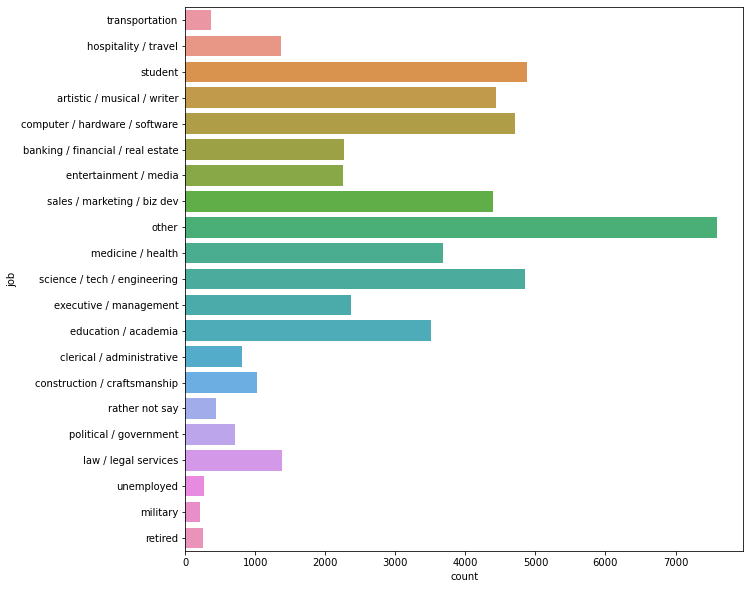

In [15]:
plt.figure(figsize=(10, 10))
graph = sns.countplot(data=profiles, y="job")
plt.show()

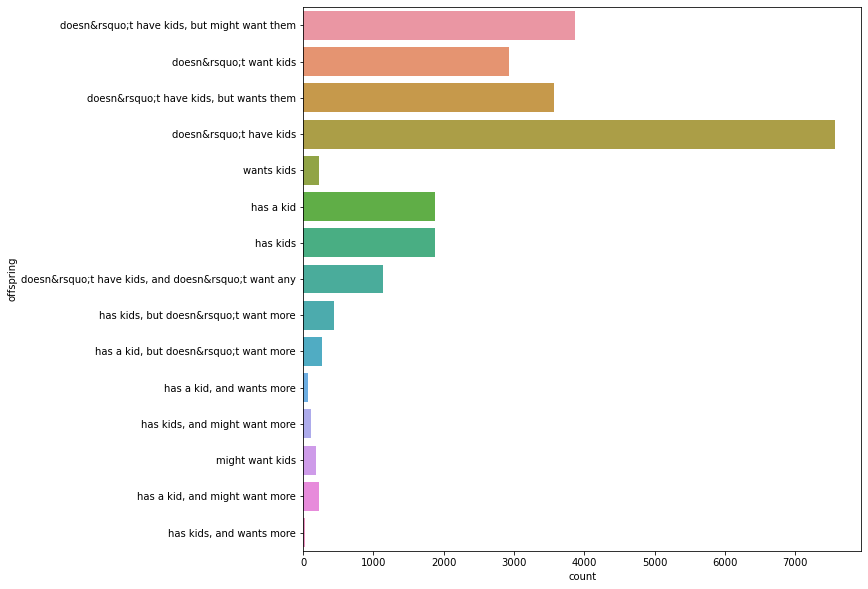

In [16]:
plt.figure(figsize=(10, 10))
graph = sns.countplot(data=profiles, y="offspring")
plt.show()

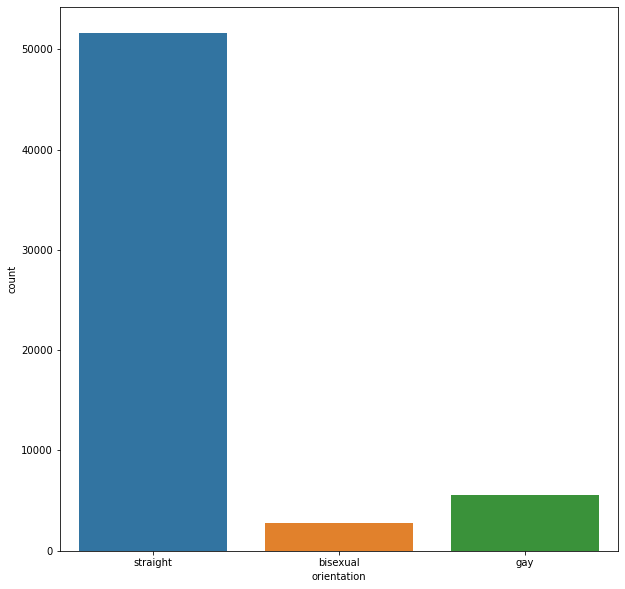

In [17]:
plt.figure(figsize=(10, 10))
graph = sns.countplot(data=profiles, x="orientation")
plt.show()

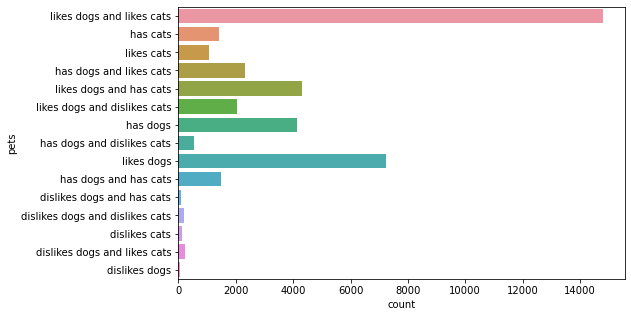

In [18]:
plt.figure(figsize=(8, 5))
graph = sns.countplot(data=profiles, y="pets")
plt.show()

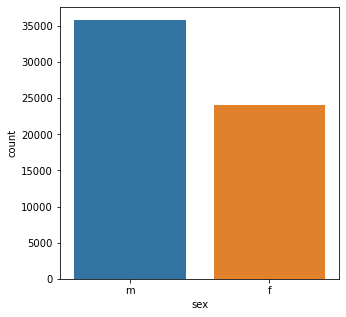

In [19]:
plt.figure(figsize=(5, 5))
graph = sns.countplot(data=profiles, x="sex")
plt.show()

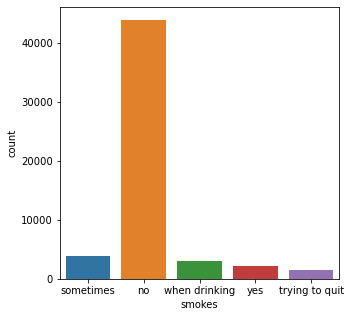

In [20]:
plt.figure(figsize=(5, 5))
graph = sns.countplot(data=profiles, x="smokes")
plt.show()

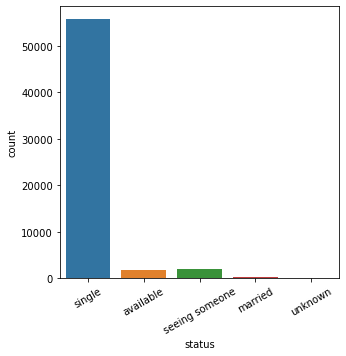

In [21]:
plt.figure(figsize=(5, 5))
graph = sns.countplot(data=profiles, x="status")
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
plt.show()

There are a few columns that needs to be cleaned before analysing. These columns include ethnicity, location, religiion, sign and speaks.

First, we perform cleaning on the sign column.

Below is the unique values of sign:

In [22]:
profiles.sign.value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
aquarius but it doesn&rsquo;t matter             1408
libra but it doesn&rsquo;t matter                1408
capricorn and it&rsquo;s fun

As the first word of all the unique sign values is the actual sign, it is extracted and placed on a new column called "sign_cleaned".

In [40]:
profiles['sign_cleaned'] = profiles.sign.str.split().str.get(0)
profiles.sign_cleaned.value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_cleaned, dtype: int64

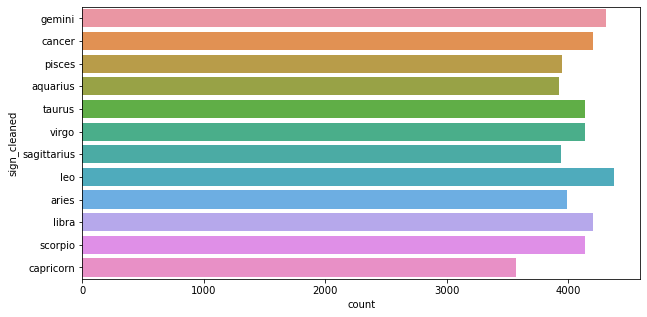

In [24]:
plt.figure(figsize=(10, 5))
graph = sns.countplot(data=profiles, y="sign_cleaned")
plt.show()

The values of religion column have a similar situation.

In [25]:
profiles.religion.value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

As the first word of all the unique religion values is the actual religion, it is extracted and placed on a new column called "religion_cleaned".

In [41]:
profiles['religion_cleaned'] = profiles.religion.str.split().str.get(0)
profiles.religion_cleaned.value_counts()

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_cleaned, dtype: int64

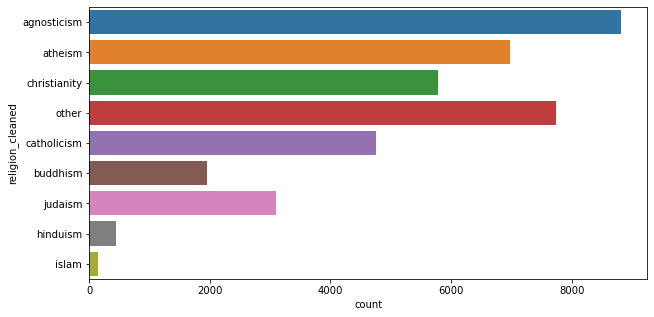

In [27]:
plt.figure(figsize=(10, 5))
graph = sns.countplot(data=profiles, y="religion_cleaned")
plt.show()

Next, we perform cleaning on the ethnicity column. The possible values and their respective counts are the following:

In [28]:
with pd.option_context("display.max_rows", 1000):
    print(profiles.ethnicity.value_counts())

white                                                                                                      32831
asian                                                                                                       6134
hispanic / latin                                                                                            2823
black                                                                                                       2008
other                                                                                                       1706
hispanic / latin, white                                                                                     1301
indian                                                                                                      1077
asian, white                                                                                                 811
white, other                                                                                    

There are a portion of users who have mixed ethnicity.

To clean the data, first we drop all rows without ethnicity, and loop through each row in the dataframe. We extract independent ethnicity from the overall string, and flag the new corresponding ethnicity column in case there is a match.

In [42]:
profiles = profiles.dropna(subset=["ethnicity"])

ethnicity_value = ['asian', 'white', 'black', 'other', 'hispanic / latin', 'pacific islander', 'native american', 'middle eastern', 'indian']

for ethnicity in ethnicity_value:
    profiles[ethnicity_value] = 0

for index, row in profiles.iterrows():
    list_of_ethnicity = list(row["ethnicity"].split(", "))
    for ethnicity in list_of_ethnicity:
        profiles.at[index, ethnicity] = 1

We can check number of users who belongs to a certain ethnicity:

In [51]:
print(profiles.asian.value_counts())
print(profiles.white.value_counts())
print(profiles.black.value_counts())
print(profiles.other.value_counts())
print(profiles["hispanic / latin"].value_counts())
print(profiles["pacific islander"].value_counts())
print(profiles["native american"].value_counts())
print(profiles["middle eastern"].value_counts())
(profiles.indian.value_counts())

0    46061
1     8205
Name: asian, dtype: int64
1    37882
0    16384
Name: white, dtype: int64
0    50938
1     3328
Name: black, dtype: int64
0    50699
1     3567
Name: other, dtype: int64
0    48909
1     5357
Name: hispanic / latin, dtype: int64
0    52793
1     1473
Name: pacific islander, dtype: int64
0    53001
1     1265
Name: native american, dtype: int64
0    53316
1      950
Name: middle eastern, dtype: int64


0    52817
1     1449
Name: indian, dtype: int64

## Main Investigation 1 - Can we predict the status of a user?

We would like to check if we can predict the status of a user based on their appearance, such as body type, height, sex and ethnicity.

First, we import the classification models, data_splitting tool, normalization tool and accuracy measuring tools.

Next, we create a new dataframe by extracting target features from the original profiles dataframe, and drop all rows with NaN values.

In [52]:
df_one = profiles[["body_type", "height", "sex", "asian", "white", "black", "other", "hispanic / latin", "pacific islander", "native american", "middle eastern", "indian", "status"]].dropna()
print(df_one)

            body_type  height sex  asian  white  black  other  \
0      a little extra    75.0   m      1      1      0      0   
1             average    70.0   m      0      1      0      0   
3                thin    71.0   m      0      1      0      0   
4            athletic    66.0   m      1      0      1      1   
5             average    67.0   m      0      1      0      0   
...               ...     ...  ..    ...    ...    ...    ...   
59938         average    73.0   m      0      0      0      0   
59942             fit    72.0   m      0      1      0      1   
59943         average    71.0   m      1      0      0      0   
59944        athletic    73.0   m      1      0      1      0   
59945         average    68.0   m      0      1      0      0   

       hispanic / latin  pacific islander  native american  middle eastern  \
0                     0                 0                0               0   
1                     0                 0                0     

Then, we need to convert categorical values into numbers.

For the body_type and sex column, we shall label these nominal categorical values using One-Hot Encoding.

In [72]:
dummy_one = pd.get_dummies(df_one[["body_type", "sex"]])

x_one = pd.concat([dummy_one, df_one[["height", "asian", "white", "black", "other", "hispanic / latin", "pacific islander", "native american", "middle eastern", "indian"]]], axis=1, sort=False)
y_one = df_one["status"]

In [63]:
print(x_one)
print(y_one)

       body_type_a little extra  body_type_athletic  body_type_average  \
0                             1                   0                  0   
1                             0                   0                  1   
3                             0                   0                  0   
4                             0                   1                  0   
5                             0                   0                  1   
...                         ...                 ...                ...   
59938                         0                   0                  1   
59942                         0                   0                  0   
59943                         0                   0                  1   
59944                         0                   1                  0   
59945                         0                   0                  1   

       body_type_curvy  body_type_fit  body_type_full figured  \
0                    0              0         

Next, we split the overall data into train & test data

In [65]:
from sklearn.model_selection import train_test_split

x_train_one, x_test_one, y_train_one, y_test_one = train_test_split(x_one, y_one, test_size=0.25, random_state=10)

We shall fit the data into a classification model, and check if we can predict the status of a person based on their appearance. We will use K-Nearest Neighbor model in this case.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

k_model_one = KNeighborsClassifier()
k_model_one.fit(x_train_one, y_train_one)

KNeighborsClassifier()

We shall test our model's accuracy with our test data. We print out the classification report and the confusion matrix for analysis.

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

predictions_one = k_model_one.predict(x_test_one)

print(classification_report(y_test_one, predictions_one))
print(confusion_matrix(y_test_one, predictions_one, labels=k_model_one.classes_))
print(k_model_one.classes_)

                precision    recall  f1-score   support

     available       0.20      0.00      0.01       375
       married       0.00      0.00      0.00        62
seeing someone       0.00      0.00      0.00       390
        single       0.93      1.00      0.97     11695

      accuracy                           0.93     12522
     macro avg       0.28      0.25      0.24     12522
  weighted avg       0.88      0.93      0.90     12522

[[    1     0     0   374     0]
 [    0     0     0    62     0]
 [    1     0     0   389     0]
 [    3     1     1 11690     0]
 [    0     0     0     0     0]]
['available' 'married' 'seeing someone' 'single' 'unknown']


Based on the results above, it seems the model is not accurate as they just mostly predict the user as single. Even though the f1-score is 0.97 for predicting single users, the f1-score of other labels are 0 or close. This may be due to the fact the labels are heavily imbalanced, as most of the users using the OkCupid application is single.

## Main Investigation 2 - Can we predict the religion of a user?

Secondly, we will try to predict religion using ethnicity and habits of a user, such as their diet, whether they smoke, drink and take drugs, as these features may have connections with their religion.

First, we extract the features into a new dataframe and drop all rows with NaN values.

In [71]:
df_two = profiles[["religion_cleaned", "diet", "drinks", "drugs", "smokes", "asian", "white", "black", "other", "hispanic / latin", "pacific islander", "native american", "middle eastern", "indian"]].dropna()
print(df_two)

      religion_cleaned                 diet      drinks      drugs  \
0          agnosticism    strictly anything    socially      never   
1          agnosticism         mostly other       often  sometimes   
7         christianity      mostly anything    socially      never   
9              atheism      mostly anything  not at all      never   
11        christianity      mostly anything    socially      never   
...                ...                  ...         ...        ...   
59931      agnosticism  strictly vegetarian      rarely      never   
59936          atheism      mostly anything    socially      never   
59942      agnosticism      mostly anything       often  sometimes   
59943     christianity      mostly anything  not at all      never   
59944      agnosticism      mostly anything    socially      often   

               smokes  asian  white  black  other  hispanic / latin  \
0           sometimes      1      1      0      0                 0   
1                

Then, because most of the features are nominal categorical values, we need to label the values using One-Hot-Encoding.

In [74]:
dummy_two = pd.get_dummies(df_two[["diet", "drinks", "drugs", "smokes"]])

x_two = pd.concat([dummy_two, df_two[["asian", "white", "black", "other", "hispanic / latin", "pacific islander", "native american", "middle eastern", "indian"]]], axis=1, sort=False)
y_two = df_two["religion_cleaned"]

'''
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

dummy_height = std.fit_transform(df_one["height"])

print(dummy_height)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nstd = StandardScaler()\n\ndummy_height = std.fit_transform(df_one["height"])\n\nprint(dummy_height)\n'

In [75]:
print(x_two)
print(y_two)

       diet_anything  diet_halal  diet_kosher  diet_mostly anything  \
0                  0           0            0                     0   
1                  0           0            0                     0   
7                  0           0            0                     1   
9                  0           0            0                     1   
11                 0           0            0                     1   
...              ...         ...          ...                   ...   
59931              0           0            0                     0   
59936              0           0            0                     1   
59942              0           0            0                     1   
59943              0           0            0                     1   
59944              0           0            0                     1   

       diet_mostly halal  diet_mostly kosher  diet_mostly other  \
0                      0                   0                  0   
1            

After that, we split the data into train & test data.

In [76]:
from sklearn.model_selection import train_test_split

x_train_two, x_test_two, y_train_two, y_test_two = train_test_split(x_two, y_two, test_size=0.25, random_state=8)

This time, we will use different models and test the accuracy in predicting religions of users.

First, we try to classify using K-Nearest Neighbor. This time, we will test with multiple k values and use the optimum k value for the final predictions.

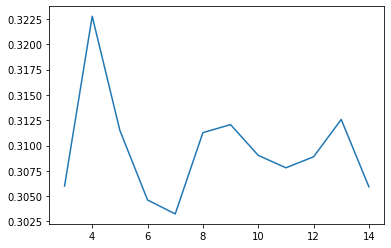

In [81]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(3, 15):
    k_model_two = KNeighborsClassifier(n_neighbors=i)
    k_model_two.fit(x_train_two, y_train_two)
    scores.append(k_model_two.score(x_train_two, y_train_two))
plt.plot(range(3,15), scores)
plt.show()

According to the graph above, the optimum k value is 4. Now, we use this k value to build our final K-Nearest Neighbor model and check for the f1-scores and confusion matrix.

In [82]:
k_model_two = KNeighborsClassifier(n_neighbors=4)
k_model_two.fit(x_train_two, y_train_two)

KNeighborsClassifier(n_neighbors=4)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

predictions_two_k_model = k_model_two.predict(x_test_two)

print(classification_report(y_test_two, predictions_two_k_model))
print(confusion_matrix(y_test_two, predictions_two_k_model, labels=k_model_two.classes_))
print(k_model_two.classes_)

              precision    recall  f1-score   support

 agnosticism       0.24      0.40      0.30       993
     atheism       0.22      0.37      0.28       797
    buddhism       0.07      0.01      0.02       217
 catholicism       0.44      0.21      0.28       572
christianity       0.26      0.20      0.23       760
    hinduism       0.54      0.52      0.53        71
       islam       0.50      0.05      0.10        19
     judaism       0.11      0.02      0.03       281
       other       0.26      0.18      0.21       899

    accuracy                           0.25      4609
   macro avg       0.29      0.22      0.22      4609
weighted avg       0.26      0.25      0.24      4609

[[394 316   8  32 110   9   0   7 117]
 [313 294   5  16  57   4   0   8 100]
 [ 63  67   3   3  42   1   0   0  38]
 [189 123   5 119  82   1   0   5  48]
 [262 177   8  57 150   2   0   9  95]
 [  8  16   1   1   0  37   0   0   8]
 [  8   1   0   1   1   1   1   0   6]
 [123  93   0   4  13 

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree_model_two = DecisionTreeClassifier()
tree_model_two.fit(x_train_two, y_train_two)

DecisionTreeClassifier()

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

predictions_two_tree = tree_model_two.predict(x_test_two)

print(classification_report(y_test_two, predictions_two_tree))
print(confusion_matrix(y_test_two, predictions_two_tree, labels=tree_model_two.classes_))
print(tree_model_two.classes_)

              precision    recall  f1-score   support

 agnosticism       0.23      0.51      0.32       993
     atheism       0.26      0.18      0.22       797
    buddhism       0.06      0.02      0.03       217
 catholicism       0.38      0.23      0.29       572
christianity       0.31      0.21      0.25       760
    hinduism       0.50      0.62      0.55        71
       islam       0.50      0.26      0.34        19
     judaism       0.22      0.02      0.04       281
       other       0.30      0.27      0.28       899

    accuracy                           0.27      4609
   macro avg       0.31      0.26      0.26      4609
weighted avg       0.28      0.27      0.25      4609

[[509 150  10  52 100  14   0   4 154]
 [419 147  12  36  51   6   0   2 124]
 [102  15   4   7  43   2   0   0  44]
 [256  33  11 134  71   1   0   2  64]
 [359  46   9  65 159   4   3   3 112]
 [  9   8   2   2   0  44   0   1   5]
 [  4   4   0   1   0   0   5   1   4]
 [173  29   2   3   6 